### Importación de datos



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np


In [13]:
# --- 1. Carga y Consolidación de Datos ---
print("Cargando y consolidando datos de las tiendas...")
try:
    # URLs de los archivos CSV de cada tienda
    urls = {
        "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
        "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
        "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
        "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
    }

# Lista para almacenar los DataFrames de cada tienda
    lista_tiendas = []
    for nombre, url in urls.items():
        # Leer el CSV y agregar una columna 'Tienda' para identificar el origen
        df = pd.read_csv(url)
        df['Tienda'] = nombre
        lista_tiendas.append(df)

    # Combinar todos los DataFrames en uno solo
    datos_completos = pd.concat(lista_tiendas, ignore_index=True)
    print("✅ Datos consolidados correctamente.")
    print(f"Total de registros: {len(datos_completos)}")

except Exception as e:
    print(f"❌ Error al cargar los datos: {e}")
    # Detiene la ejecución si hay un error
    raise

Cargando y consolidando datos de las tiendas...
✅ Datos consolidados correctamente.
Total de registros: 9435


In [14]:
# --- 2. Exploración Inicial de Datos ---
print("\n--- Exploración Inicial del Conjunto de Datos ---")
print("Información general del DataFrame:")
datos_completos.info()

print("\nResumen de valores nulos por columna:")
print(datos_completos.isnull().sum())
# Limpieza básica: Eliminar filas donde el precio es nulo, ya que son cruciales para la facturación
datos_completos.dropna(subset=['Precio'], inplace=True)



--- Exploración Inicial del Conjunto de Datos ---
Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tienda                  9435 non-null   object 
dtypes: floa

#1. Análisis de facturación




--- 1. Facturación Total por Tienda ---
Tienda
Tienda 1   $1,150,880,400.00
Tienda 2   $1,116,343,500.00
Tienda 3   $1,098,019,600.00
Tienda 4   $1,038,375,700.00


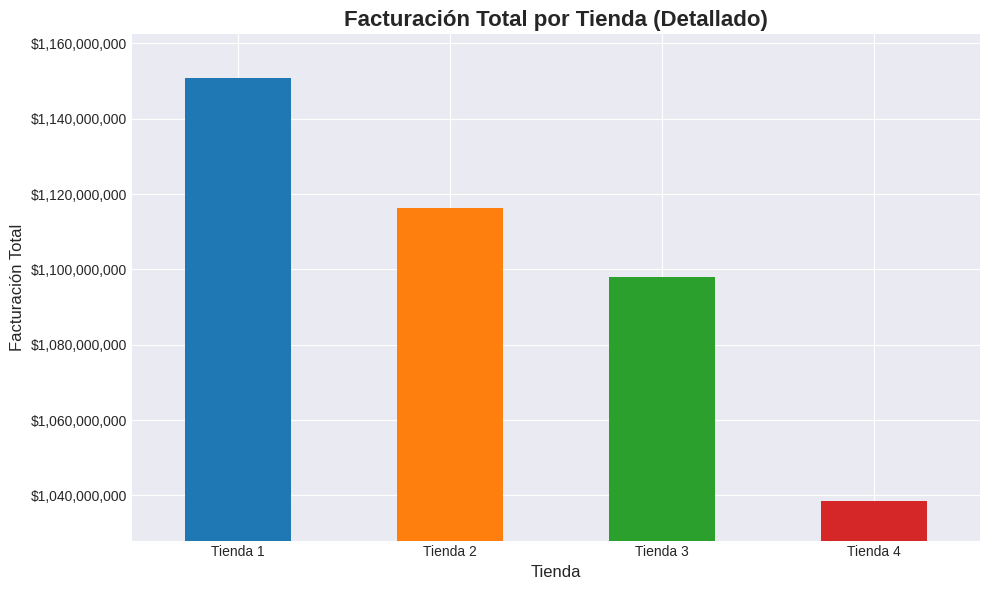

In [15]:
print("\n--- 1. Facturación Total por Tienda ---")
facturacion_total = datos_completos.groupby('Tienda')['Precio'].sum().sort_values(ascending=False)
print(facturacion_total.to_string(float_format='${:,.2f}'.format))


plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))

facturacion_total.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# --- 💡 AJUSTE PARA EJE Y MÁS EXACTO ---
# Calculamos el valor mínimo y máximo de la facturación
min_val = facturacion_total.min()
max_val = facturacion_total.max()
# Establecemos el límite del eje Y con un pequeño margen (ej. 1% por debajo)
# para que la barra más pequeña no comience justo en el borde.
ax.set_ylim(min_val * 0.99, max_val * 1.01)
# --- FIN DEL AJUSTE ---

# Formatear el eje Y como moneda
formatter = mticker.FuncFormatter(lambda x, p: f'${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Añadir títulos y etiquetas
ax.set_title('Facturación Total por Tienda (Detallado)', fontsize=16, fontweight='bold')
ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Facturación Total', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()



In [16]:

#  Métodos de Pago por Tienda
print("\n--- 1B. Conteo de Métodos de Pago por Tienda ---")
metodos_pago = datos_completos.groupby(['Tienda', 'Método de pago']).size().reset_index(name='Conteo')
print(metodos_pago.to_string())

#  Análisis de Cuotas para Tarjetas de Crédito
print("\n--- 1C. Promedio de Cuotas con Tarjeta de Crédito por Categoría ---")
# Filtramos solo las compras con tarjeta de crédito
tarjeta_credito_df = datos_completos[datos_completos['Método de pago'] == 'Tarjeta de crédito'].copy()


# Verificamos el total de ventas con tarjeta de crédito por tienda para cuadrar los datos
print("\nVerificación: Total de ventas con Tarjeta de Crédito por Tienda")
total_tc = tarjeta_credito_df.groupby('Tienda').size()
print(total_tc.to_string())


--- 1B. Conteo de Métodos de Pago por Tienda ---
      Tienda      Método de pago  Conteo
0   Tienda 1               Cupón     137
1   Tienda 1               Nequi     483
2   Tienda 1  Tarjeta de crédito    1704
3   Tienda 1   Tarjeta de débito      35
4   Tienda 2               Cupón     141
5   Tienda 2               Nequi     467
6   Tienda 2  Tarjeta de crédito    1721
7   Tienda 2   Tarjeta de débito      30
8   Tienda 3               Cupón     101
9   Tienda 3               Nequi     468
10  Tienda 3  Tarjeta de crédito    1753
11  Tienda 3   Tarjeta de débito      37
12  Tienda 4               Cupón     125
13  Tienda 4               Nequi     482
14  Tienda 4  Tarjeta de crédito    1720
15  Tienda 4   Tarjeta de débito      31

--- 1C. Promedio de Cuotas con Tarjeta de Crédito por Categoría ---

Verificación: Total de ventas con Tarjeta de Crédito por Tienda
Tienda
Tienda 1    1704
Tienda 2    1721
Tienda 3    1753
Tienda 4    1720


# 2. Ventas por categoría

Generando dashboard para: Tienda 1...
✅ Dashboard 'dashboard_Tienda_1.png' guardado.


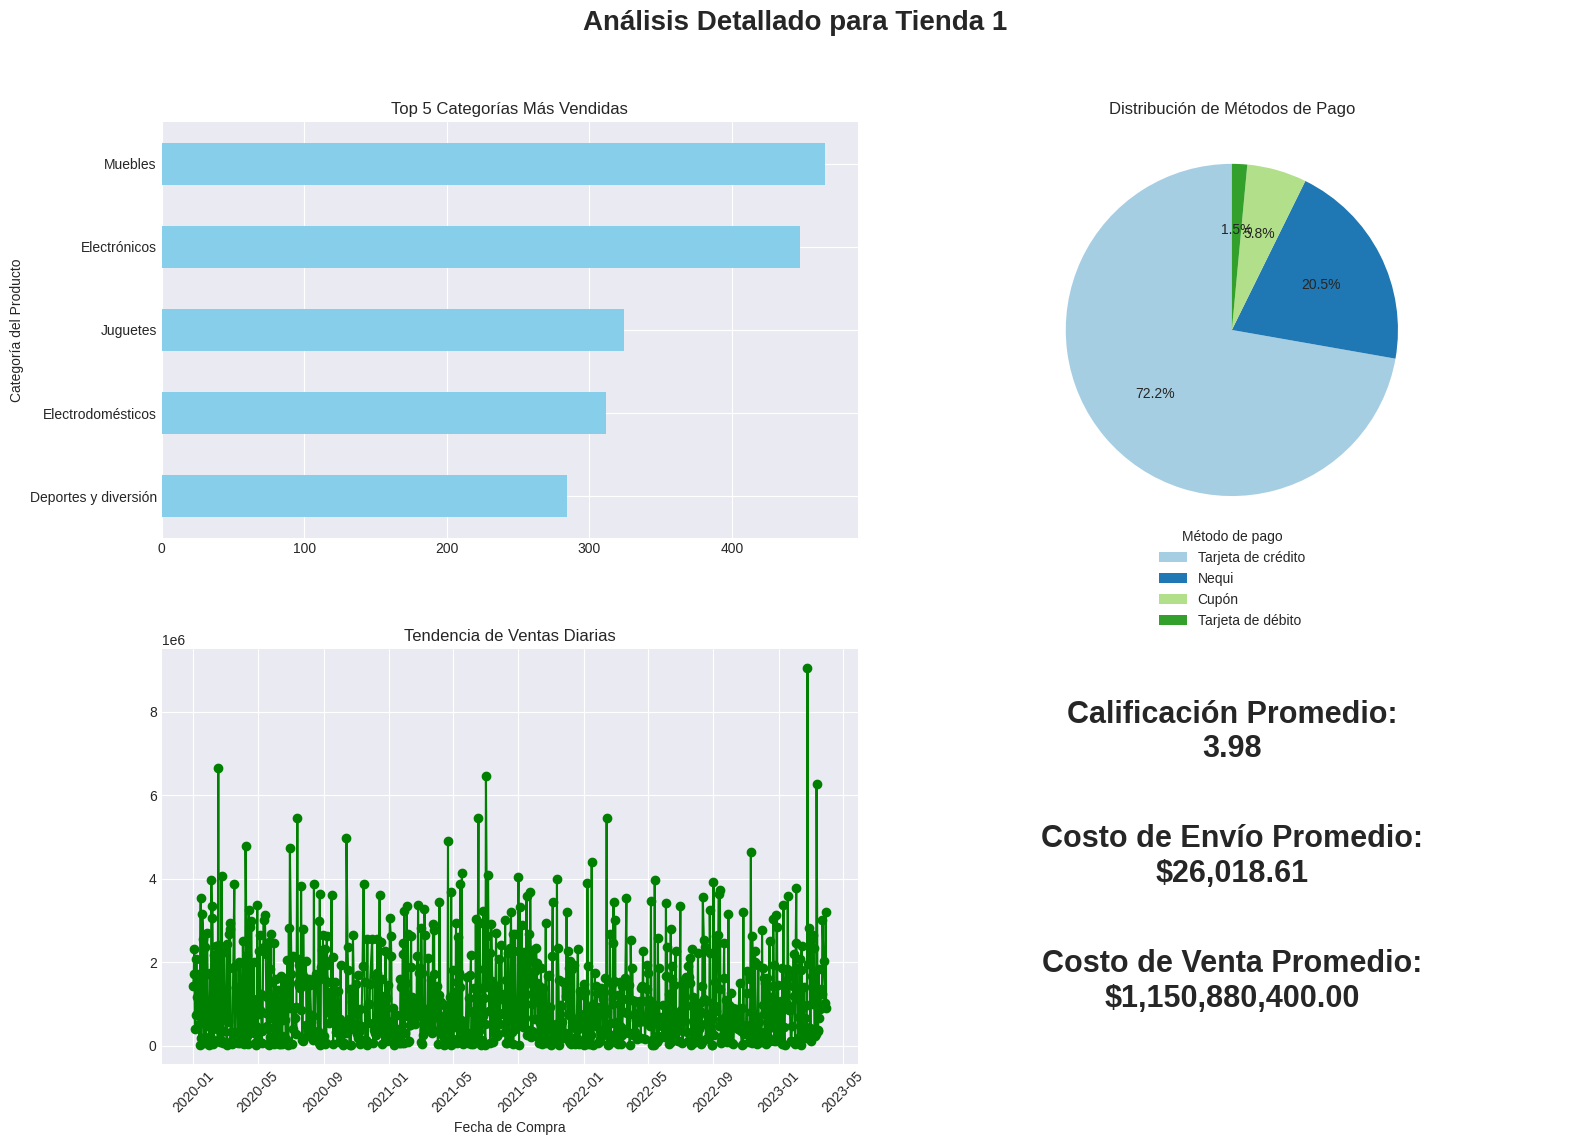

In [17]:
# --- Dashboard Detallado por Tienda ---
tienda_a_filtrar = 'Tienda 1'
print(f"Generando dashboard para: {tienda_a_filtrar}...")

# SOLUCIÓN 2: Usar .copy() para evitar el SettingWithCopyWarning
df_tienda = datos_completos[datos_completos['Tienda'] == tienda_a_filtrar].copy()

if df_tienda.empty:
    print(f"No se encontraron datos para '{tienda_a_filtrar}'")
else:
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Análisis Detallado para {tienda_a_filtrar}', fontsize=20, fontweight='bold')

    # 1. Gráfico de Ventas por Categoría (Top 5)
    ventas_categoria = df_tienda['Categoría del Producto'].value_counts().nlargest(5)
    ventas_categoria.plot(kind='barh', ax=axs[0, 0], color='skyblue')
    axs[0, 0].set_title('Top 5 Categorías Más Vendidas')
    axs[0, 0].invert_yaxis()

    # 2. Gráfico de Métodos de Pago
    metodos_pago = df_tienda['Método de pago'].value_counts()
    wedges, texts, autotexts = axs[0, 1].pie(metodos_pago,
                                            autopct='%1.1f%%',
                                            startangle=90,
                                            colors=plt.cm.Paired.colors)
    axs[0, 1].set_title('Distribución de Métodos de Pago')
    axs[0, 1].legend(wedges, metodos_pago.index, title="Método de pago", loc="center", bbox_to_anchor=(0.5, -0.1))

    # 3. Gráfico de Ventas en el Tiempo
    # Convert 'Fecha de Compra' to datetime objects
    df_tienda['Fecha de Compra'] = pd.to_datetime(df_tienda['Fecha de Compra'], format='%d/%m/%Y')
    ventas_diarias = df_tienda.groupby(df_tienda['Fecha de Compra'].dt.date)['Precio'].sum()
    ventas_diarias.plot(kind='line', ax=axs[1, 0], marker='o', linestyle='-', color='green')
    axs[1, 0].set_title('Tendencia de Ventas Diarias')
    axs[1, 0].tick_params(axis='x', rotation=45)

    # 4. Calificación Promedio y Envío Promedio
    calificacion_prom = df_tienda['Calificación'].mean()
    envio_prom = df_tienda['Costo de envío'].mean()
    facturacion_total = df_tienda['Precio'].sum()
    axs[1, 1].axis('off')
    axs[1, 1].text(0.5, 0.8, f'Calificación Promedio:\n{calificacion_prom:.2f}',
                   ha='center', va='center', fontsize=22, fontweight='bold')
    axs[1, 1].text(0.5, 0.5, f'Costo de Envío Promedio:\n${envio_prom:,.2f}',
                   ha='center', va='center', fontsize=22, fontweight='bold')
    axs[1, 1].text(0.5, 0.2, f'Costo de Venta Promedio:\n${facturacion_total:,.2f}',
                   ha='center', va='center', fontsize=22, fontweight='bold')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    nombre_archivo = f'dashboard_{tienda_a_filtrar.replace(" ", "_")}.png'
    plt.savefig(nombre_archivo)
    print(f"✅ Dashboard '{nombre_archivo}' guardado.")


In [18]:
print("\n--- 2. Categoría Más Popular por Tienda ---")
tienda_a_filtrar = 'Tienda 1'
print(f"\n{'='*50}")
print(f"Generando reporte para: {tienda_a_filtrar}...")

df_tienda = datos_completos[datos_completos['Tienda'] == tienda_a_filtrar].copy()

if df_tienda.empty:
    print(f"No se encontraron datos para '{tienda_a_filtrar}'")
else:
    fig.suptitle(f'Análisis Detallado para {tienda_a_filtrar}', fontsize=20, fontweight='bold')

    # Reportes
    print(f"\n{'='*50}")
    ventas_categoria = df_tienda['Categoría del Producto'].value_counts().nlargest(5)
    print(ventas_categoria)
    print(f"\n{'='*50}")
    metodos_pago = df_tienda['Método de pago'].value_counts()
    print(metodos_pago)
    print(f"\n{'='*50}")
    envio_prom = df_tienda['Costo de envío'].mean()
    print(f'Costo de Envío Promedio:\n${envio_prom:,.2f}')
    print(f"\n{'='*50}")
    pd.set_option('display.max_rows', 5)
    df_tienda['Fecha de Compra'] = pd.to_datetime(df_tienda['Fecha de Compra'], format='%d/%m/%Y')
    ventas_diarias = df_tienda.groupby(df_tienda['Fecha de Compra'].dt.date)['Precio'].sum().reset_index()
    # ventas=ventas_diarias.to_string(float_format='{:,.2f}'.format)
    print(ventas_diarias)
#------------------------------------------------------------------------



--- 2. Categoría Más Popular por Tienda ---

Generando reporte para: Tienda 1...

Categoría del Producto
Muebles                 465
Electrónicos            448
Juguetes                324
Electrodomésticos       312
Deportes y diversión    284
Name: count, dtype: int64

Método de pago
Tarjeta de crédito    1704
Nequi                  483
Cupón                  137
Tarjeta de débito       35
Name: count, dtype: int64

Costo de Envío Promedio:
$26,018.61

     Fecha de Compra     Precio
0         2020-01-01  1440000.0
1         2020-01-02  1707900.0
...              ...        ...
1016      2023-03-30  3202000.0
1017      2023-03-31   911700.0

[1018 rows x 2 columns]



Generando gráfico de métodos de pago...

Tienda                   Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar      3.50      3.20      3.90      3.50
Deportes y diversión         3.60      3.30      3.70      3.60
Electrodomésticos            3.60      3.60      3.90      3.70
Electrónicos                 3.80      3.90      3.50      3.40
Instrumentos musicales       3.80      3.60      3.90      3.80
Juguetes                     3.50      3.40      3.60      3.40
Libros                       3.60      3.90      3.50      3.90
Muebles                      3.90      3.60      3.50      3.70

Método de pago  Cupón  Nequi  Tarjeta de crédito  Tarjeta de débito
Tienda                                                             
Tienda 1          137    483                1704                 35
Tienda 2          141    467                1721                 30
Tienda 3          101    468                1

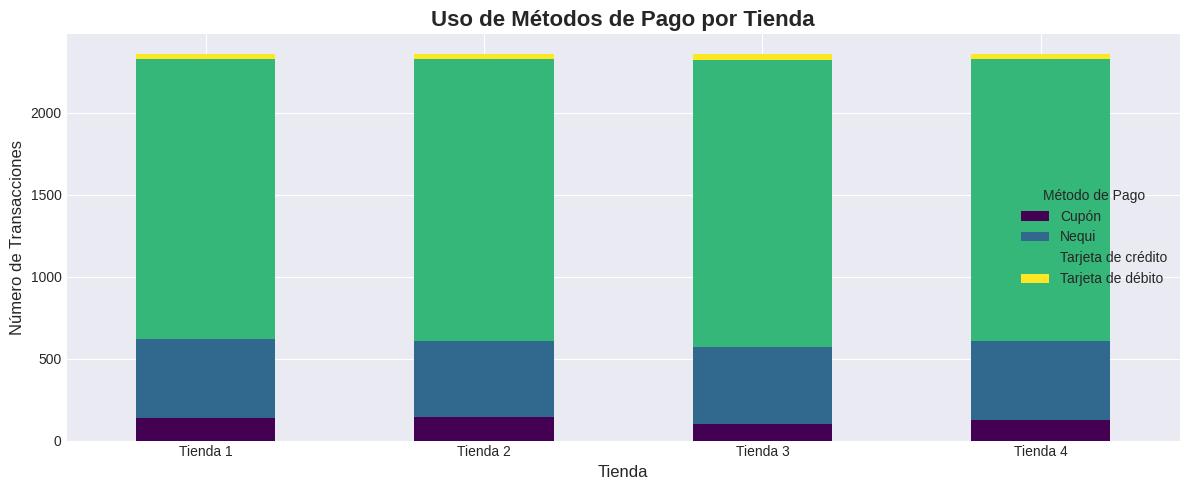

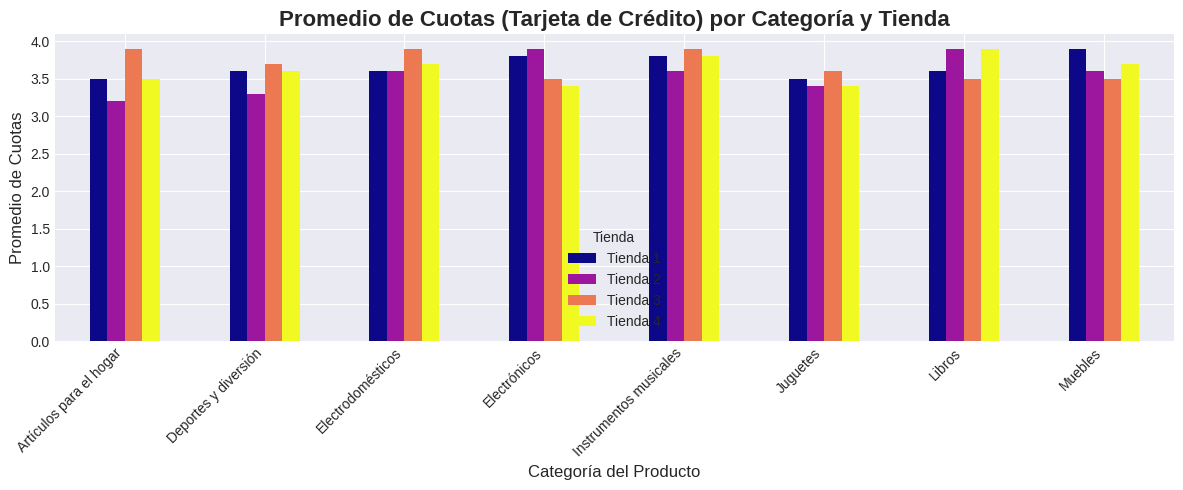

In [19]:
# B. Conteo de Métodos de Pago
metodos_pago = datos_completos.groupby(['Tienda', 'Método de pago']).size().reset_index(name='Conteo')

# C. Promedio de Cuotas con Tarjeta de Crédito
# Asegurarse de que el nombre del método de pago sea exacto
# Usamos .str.lower() para evitar problemas de mayúsculas/minúsculas
tarjeta_credito_df = datos_completos[datos_completos['Método de pago'] == 'Tarjeta de crédito'].copy()
cuotas_promedio = tarjeta_credito_df.groupby(['Tienda', 'Categoría del Producto'])['Cantidad de cuotas'].mean().reset_index()
cuotas_promedio['Cantidad de cuotas'] = cuotas_promedio['Cantidad de cuotas'].round(1)
# --- 3. Generación de Gráficos ---
plt.style.use('seaborn-v0_8-darkgrid')

# Gráfico 1: Uso de Métodos de Pago por Tienda (Barras Apiladas)
print("\nGenerando gráfico de métodos de pago...")
# Pivotamos los datos para el formato del gráfico
metodos_pago_pivot = metodos_pago.pivot(index='Tienda', columns='Método de pago', values='Conteo').fillna(0)

metodos_pago_pivot.plot(kind='bar', stacked=True, figsize=(12, 5), colormap='viridis')
plt.title('Uso de Métodos de Pago por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Número de Transacciones', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Método de Pago')
plt.tight_layout()

# Gráfico 2: Promedio de Cuotas por Categoría (Barras Agrupadas)

cuotas_promedio_pivot = cuotas_promedio.pivot(index='Categoría del Producto', columns='Tienda', values='Cantidad de cuotas').fillna(0)

cuotas_promedio_pivot.plot(kind='bar', figsize=(12, 5), colormap='plasma')
plt.title('Promedio de Cuotas (Tarjeta de Crédito) por Categoría y Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Promedio de Cuotas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda')
plt.tight_layout()

print(f"\n{'='*50}")
# print(ventas_diarias.to_string(float_format='{:,.2f}'.format))
print(cuotas_promedio_pivot.to_string(float_format='{:,.2f}'.format))


print(f"\n{'='*50}")
print(metodos_pago_pivot)




# 3. Calificación promedio de la tienda


In [20]:
print("\n--- 3. Calificación Promedio de Clientes por Tienda ---")
calificacion_promedio = datos_completos.groupby('Tienda')['Calificación'].mean().sort_values(ascending=False)
print(calificacion_promedio.to_string(float_format='{:.2f}'.format))


--- 3. Calificación Promedio de Clientes por Tienda ---
Tienda
Tienda 3   4.05
Tienda 2   4.04
Tienda 4   4.00
Tienda 1   3.98


Generando gráfico de calificaciones 


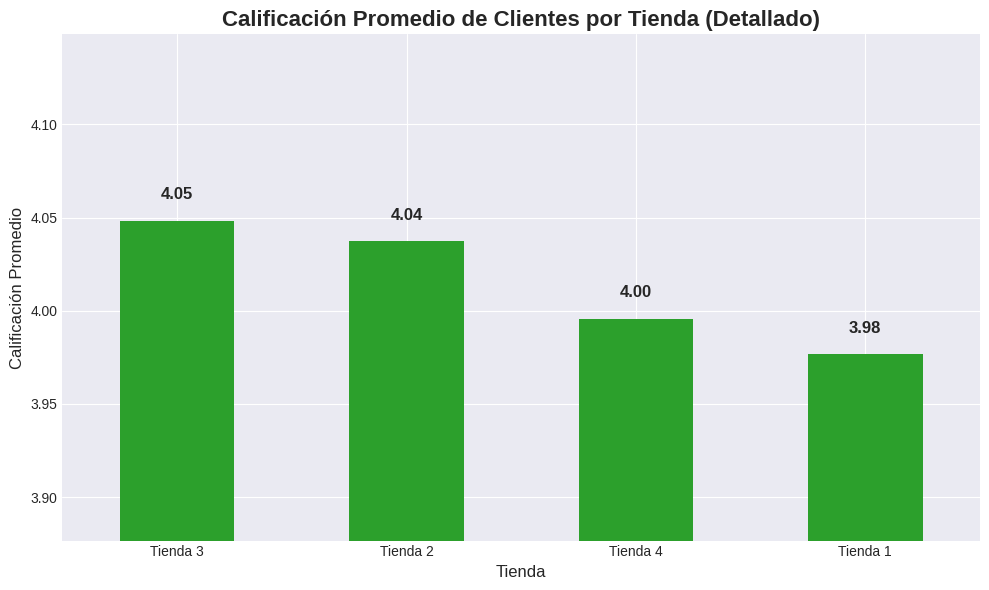

In [21]:
print("Generando gráfico de calificaciones ")
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))

bars = calificacion_promedio.plot(kind='bar', ax=ax, color='#2ca02c')

# --- 💡 CAMBIO CLAVE: LÍMITES DINÁMICOS PARA EL EJE Y ---
# Calculamos el valor mínimo y máximo de las calificaciones
min_val = calificacion_promedio.min()
max_val = calificacion_promedio.max()
# Establecemos el límite del eje Y con un pequeño margen (ej. 0.1)
# para que las barras no toquen los bordes superior e inferior.
ax.set_ylim(min_val - 0.1, max_val + 0.1)
# --- FIN DEL CAMBIO ---

# Añadir etiquetas con el valor exacto sobre cada barra
for bar in bars.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.01, # Ajustamos un poco la altura del texto
            f'{bar.get_height():.2f}',
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold')

# Añadir títulos y etiquetas
ax.set_title('Calificación Promedio de Clientes por Tienda (Detallado)', fontsize=16, fontweight='bold')
ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Calificación Promedio', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()


# 4. Productos más y menos vendidos

In [22]:
print("\n--- 4. Productos Más y Menos Vendidos por Tienda ---")
# Contamos las ventas por producto en cada tienda
ventas_producto = datos_completos.groupby(['Tienda', 'Producto']).size().reset_index(name='Numero_Ventas')
for tienda in datos_completos['Tienda'].unique():
    # Filtramos los datos para la tienda actual
    productos_tienda = ventas_producto[ventas_producto['Tienda'] == tienda]

    # Encontramos el producto más y menos vendido
    mas_vendido = productos_tienda.loc[productos_tienda['Numero_Ventas'].idxmax()]
    menos_vendido = productos_tienda.loc[productos_tienda['Numero_Ventas'].idxmin()]

    print(f"\nTienda: {tienda}")
    print(f"  - Más Vendido: '{mas_vendido['Producto']}' ({mas_vendido['Numero_Ventas']} unidades)")
    print(f"  - Menos Vendido: '{menos_vendido['Producto']}' ({menos_vendido['Numero_Ventas']} unidades)")



--- 4. Productos Más y Menos Vendidos por Tienda ---

Tienda: Tienda 1
  - Más Vendido: 'Armario' (60 unidades)
  - Menos Vendido: 'Auriculares con micrófono' (33 unidades)

Tienda: Tienda 2
  - Más Vendido: 'Iniciando en programación' (65 unidades)
  - Menos Vendido: 'Juego de mesa' (32 unidades)

Tienda: Tienda 3
  - Más Vendido: 'Kit de bancas' (57 unidades)
  - Menos Vendido: 'Bloques de construcción' (35 unidades)

Tienda: Tienda 4
  - Más Vendido: 'Cama box' (62 unidades)
  - Menos Vendido: 'Guitarra eléctrica' (33 unidades)



📈 ANÁLISIS DE PRODUCTOS MÁS VENDIDOS (CANTIDAD) PARA: TIENDA 1

--- Top 5 Productos Más Vendidos (por Cantidad de Unidades) ---
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56

Generando gráfico de barras...


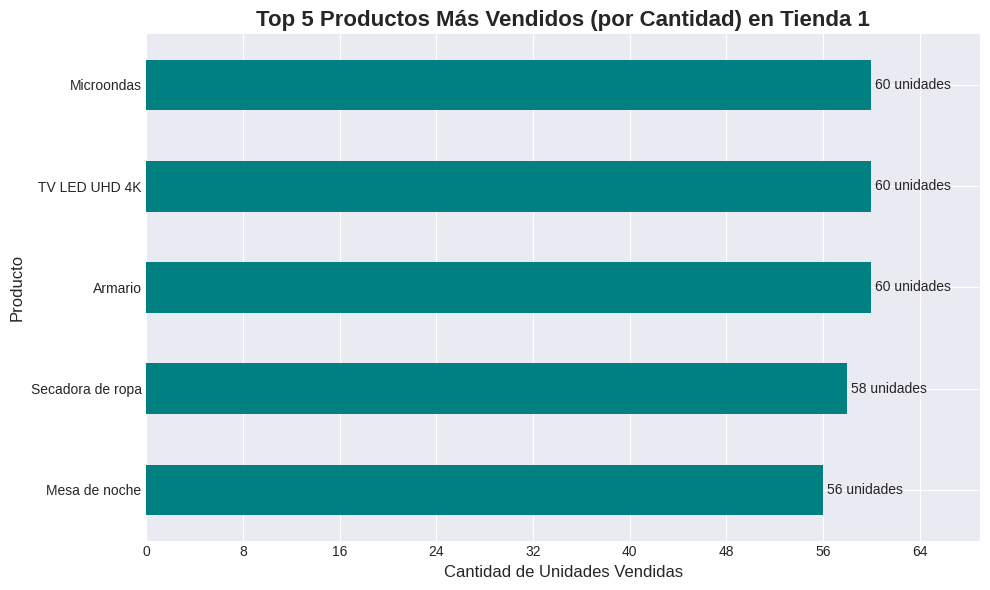

In [23]:
# --- 2. Análisis de Top 5 Productos por Tienda (por Cantidad) ---

# 💡 MODIFICA AQUÍ EL NOMBRE DE LA TIENDA QUE QUIERES ANALIZAR
tienda_a_analizar = 'Tienda 1'

# Filtramos los datos para la tienda seleccionada
df_tienda = datos_completos[datos_completos['Tienda'] == tienda_a_analizar].copy()

if df_tienda.empty:
    print(f"No se encontraron datos para '{tienda_a_analizar}'")
else:
    print(f"\n{'='*50}")
    print(f"📈 ANÁLISIS DE PRODUCTOS MÁS VENDIDOS (CANTIDAD) PARA: {tienda_a_analizar.upper()}")
    print(f"{'='*50}")

    # Contar las ventas de cada producto
    ventas_por_producto = df_tienda['Producto'].value_counts()

    # --- Resumen en Texto ---
    print("\n--- Top 5 Productos Más Vendidos (por Cantidad de Unidades) ---")
    top_5_productos = ventas_por_producto.head(5)
    print(top_5_productos.to_string())

    # --- Generación del Gráfico de Barras Horizontales ---
    print("\nGenerando gráfico de barras...")

    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Usamos los datos del top 5 por cantidad
    bars = top_5_productos.plot(kind='barh', ax=ax, color='teal')

    # Añadir etiquetas con el número de unidades al final de cada barra
    ax.bar_label(bars.containers[0], fmt='%d unidades', padding=3, fontsize=10)

    # Invertir el eje Y para que el producto con MÁS ventas quede arriba
    ax.invert_yaxis()

    # Asegurar que el eje X muestre números enteros y dar un poco de espacio
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.set_xlim(right=top_5_productos.max() * 1.15) # 15% de espacio extra para las etiquetas

    # Títulos y etiquetas
    ax.set_title(f'Top 5 Productos Más Vendidos (por Cantidad) en {tienda_a_analizar}', fontsize=16, fontweight='bold')
    ax.set_xlabel('Cantidad de Unidades Vendidas', fontsize=12)
    ax.set_ylabel('Producto', fontsize=12)

    plt.tight_layout()



💰 ANÁLISIS DE FACTURACIÓN POR PRODUCTO PARA: TIENDA 1

--- Top 5 Productos por Facturación ---
Producto
TV LED UHD 4K      $142,150,200.00
Refrigerador       $112,143,300.00
Iphone 15           $97,902,200.00
Smart TV            $67,452,100.00
Lavadora de ropa    $65,783,600.00

El producto con mayor facturación, 'TV LED UHD 4K', representa el 12.35% de la facturación total de esta tienda.

DISTRIBUCIÓN POR FACTURACIÓN...


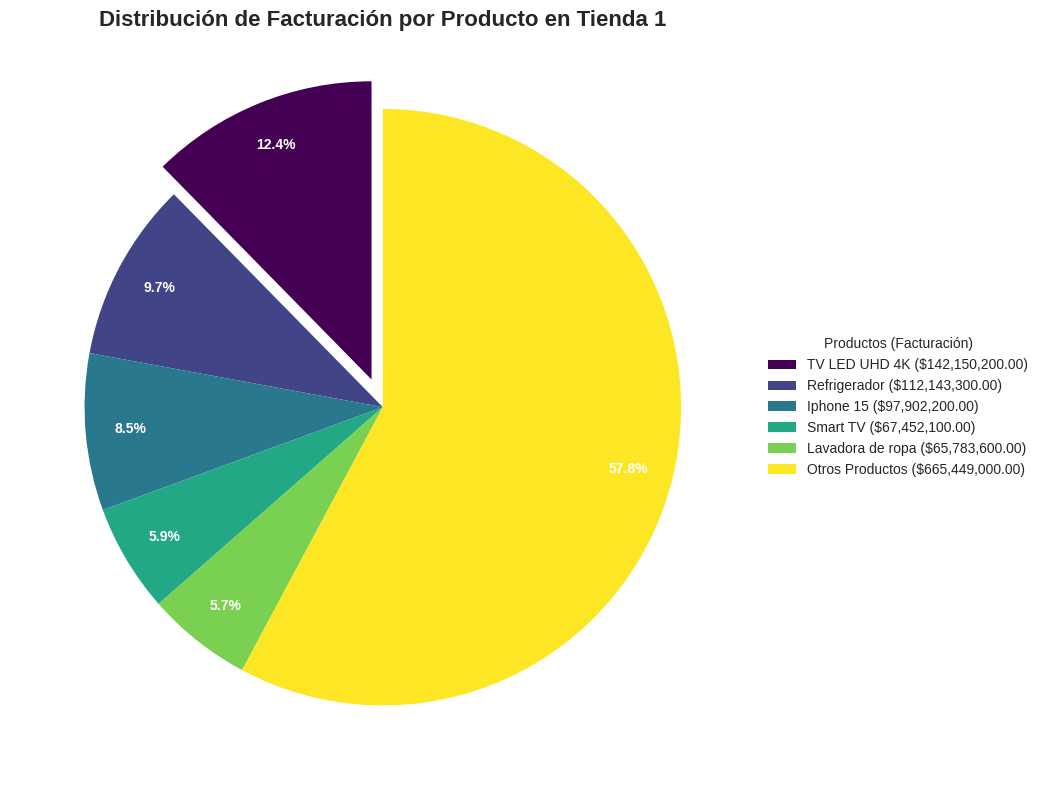

In [25]:
tienda_a_analizar = 'Tienda 1'

# Filtramos los datos para la tienda seleccionada
df_tienda = datos_completos[datos_completos['Tienda'] == tienda_a_analizar].copy()

if df_tienda.empty:
    print(f"No se encontraron datos para '{tienda_a_analizar}'")
else:
    print(f"\n{'='*50}")
    print(f"💰 ANÁLISIS DE FACTURACIÓN POR PRODUCTO PARA: {tienda_a_analizar.upper()}")
    print(f"{'='*50}")

    # --- LÓGICA ACTUALIZADA: Agrupar por producto y sumar el 'Precio' ---
    facturacion_por_producto = df_tienda.groupby('Producto')['Precio'].sum().sort_values(ascending=False)

    # Calcular la facturación total de la tienda
    facturacion_total_tienda = df_tienda['Precio'].sum()

    # --- Resumen en Texto ---
    print("\n--- Top 5 Productos por Facturación ---")
    top_5_productos = facturacion_por_producto.head(5)
    print(top_5_productos.to_string(float_format='${:,.2f}'.format))

    # Calcular el porcentaje del producto más vendido sobre la facturación total
    nombre_top_1 = top_5_productos.index[0]
    facturacion_top_1 = top_5_productos.iloc[0]
    porcentaje_top_1 = (facturacion_top_1 / facturacion_total_tienda) * 100

    print(f"\nEl producto con mayor facturación, '{nombre_top_1}', representa el {porcentaje_top_1:.2f}% de la facturación total de esta tienda.")

    # --- Generación del Gráfico ---
    print("\nDISTRIBUCIÓN POR FACTURACIÓN...")

    # Preparar datos para el gráfico (Top 5 + "Otros")
    if len(facturacion_por_producto) > 5:
        suma_otros = facturacion_por_producto.iloc[5:].sum()
        datos_grafico = top_5_productos.copy()
        datos_grafico['Otros Productos'] = suma_otros
    else:
        datos_grafico = facturacion_por_producto

    # Crear el gráfico de pastel
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, ax = plt.subplots(figsize=(12, 8))
    explode = [0.1] + [0] * (len(datos_grafico) - 1)

    wedges, texts, autotexts = ax.pie(datos_grafico,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      explode=explode,
                                      pctdistance=0.85,
                                      colors=plt.cm.viridis(np.linspace(0, 1, len(datos_grafico))))

    plt.setp(autotexts, size=10, weight="bold", color="white")

    ax.set_title(f'Distribución de Facturación por Producto en {tienda_a_analizar}', fontsize=16, fontweight='bold')
    # Crear leyenda con valores de facturación formateados
    legend_labels = [f'{name} (${value:,.2f})' for name, value in datos_grafico.items()]
    ax.legend(wedges, legend_labels,
              title="Productos (Facturación)",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.tight_layout()


💰 ANÁLISIS DE FACTURACIÓN POR PRODUCTO PARA: TIENDA 1

--- Top 5 Productos con MAYOR Facturación ---
Producto
TV LED UHD 4K      $142,150,200.00
Refrigerador       $112,143,300.00
Iphone 15           $97,902,200.00
Smart TV            $67,452,100.00
Lavadora de ropa    $65,783,600.00

El producto con mayor facturación, 'TV LED UHD 4K', representa el 12.35% de la facturación total de esta tienda.

--- Top 5 Productos con MENOR Facturación ---
Producto
Cuerda para saltar     $652,800.00
Dinosaurio Rex         $688,900.00
Cubo mágico 8x8        $696,900.00
Set de vasos         $1,359,100.00
Ajedrez de madera    $1,430,600.00

El producto con menor facturación, 'Cuerda para saltar', representa solo el 0.0567% de la facturación total.

Generando gráfico de distribución de facturación...


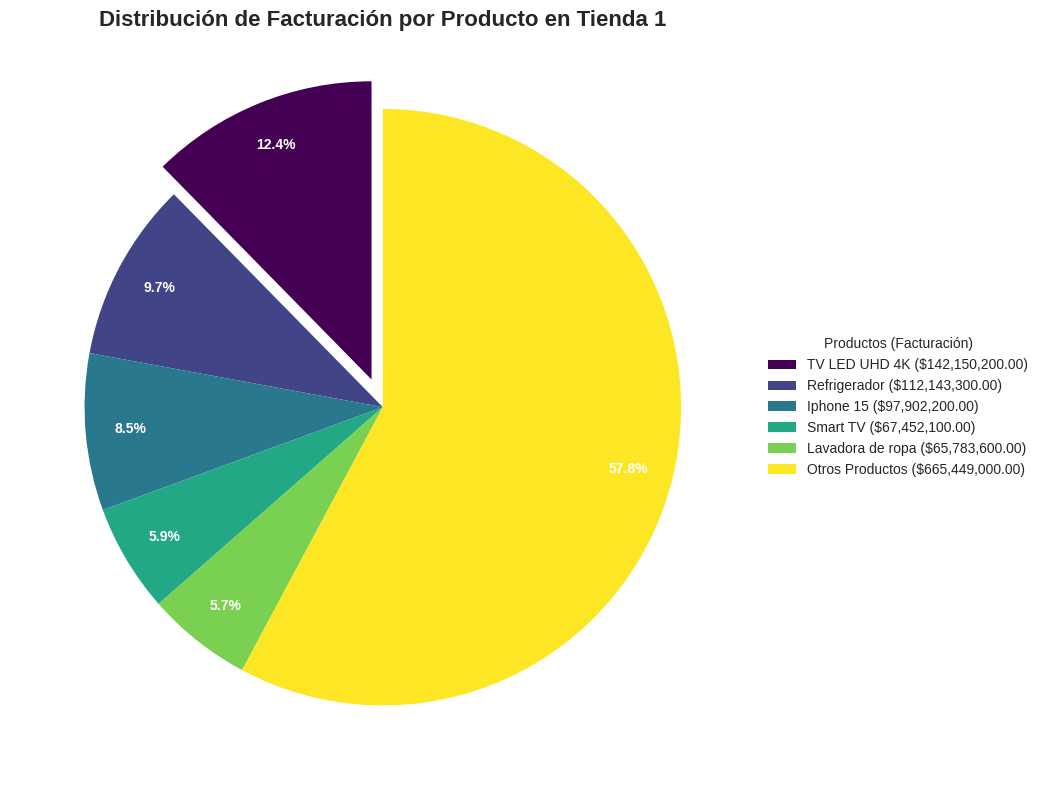

In [26]:
tienda_a_analizar = 'Tienda 1'

# Filtramos los datos para la tienda seleccionada
df_tienda = datos_completos[datos_completos['Tienda'] == tienda_a_analizar].copy()

if df_tienda.empty:
    print(f"No se encontraron datos para '{tienda_a_analizar}'")
else:
    print(f"\n{'='*50}")
    print(f"💰 ANÁLISIS DE FACTURACIÓN POR PRODUCTO PARA: {tienda_a_analizar.upper()}")
    print(f"{'='*50}")

    facturacion_por_producto = df_tienda.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
    facturacion_total_tienda = df_tienda['Precio'].sum()

    # --- Resumen en Texto - MÁS Vendidos ---
    print("\n--- Top 5 Productos con MAYOR Facturación ---")
    top_5_productos = facturacion_por_producto.head(5)
    print(top_5_productos.to_string(float_format='${:,.2f}'.format))

    nombre_top_1 = top_5_productos.index[0]
    facturacion_top_1 = top_5_productos.iloc[0]
    porcentaje_top_1 = (facturacion_top_1 / facturacion_total_tienda) * 100
    print(f"\nEl producto con mayor facturación, '{nombre_top_1}', representa el {porcentaje_top_1:.2f}% de la facturación total de esta tienda.")

    # --- 💡 NUEVO: Resumen en Texto - MENOS Vendidos ---
    print("\n--- Top 5 Productos con MENOR Facturación ---")
    bottom_5_productos = facturacion_por_producto.tail(5)
    # Ordenamos de forma ascendente para mostrar el de menor facturación primero
    print(bottom_5_productos.sort_values(ascending=True).to_string(float_format='${:,.2f}'.format))

    nombre_bottom_1 = bottom_5_productos.sort_values(ascending=True).index[0]
    facturacion_bottom_1 = bottom_5_productos.min()
    porcentaje_bottom_1 = (facturacion_bottom_1 / facturacion_total_tienda) * 100
    print(f"\nEl producto con menor facturación, '{nombre_bottom_1}', representa solo el {porcentaje_bottom_1:.4f}% de la facturación total.")

    # --- Generación del Gráfico (sigue mostrando el Top 5 + Otros) ---
    print("\nGenerando gráfico de distribución de facturación...")
    if len(facturacion_por_producto) > 5:
        suma_otros = facturacion_por_producto.iloc[5:].sum()
        datos_grafico = top_5_productos.copy()
        datos_grafico['Otros Productos'] = suma_otros
    else:
        datos_grafico = facturacion_por_producto

    plt.style.use('seaborn-v0_8-darkgrid')
    fig, ax = plt.subplots(figsize=(12, 8))
    explode = [0.1] + [0] * (len(datos_grafico) - 1)

    wedges, texts, autotexts = ax.pie(datos_grafico,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      explode=explode,
                                      pctdistance=0.85,
                                      colors=plt.cm.viridis(np.linspace(0, 1, len(datos_grafico))))

    plt.setp(autotexts, size=10, weight="bold", color="white")

    ax.set_title(f'Distribución de Facturación por Producto en {tienda_a_analizar}', fontsize=16, fontweight='bold')
    legend_labels = [f'{name} (${value:,.2f})' for name, value in datos_grafico.items()]
    ax.legend(wedges, legend_labels,
              title="Productos (Facturación)",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.tight_layout()


💰 ANÁLISIS DE FACTURACIÓN POR PRODUCTO PARA: TIENDA 1

Generando gráfico de pastel (Mayores Ventas)...

Generando gráfico de barras (Menores Ventas)...
✅ Gráfico 'facturacion_bottom_5_productos_Tienda_1.png' guardado.

Generando gráfico de barras (Mayores Ventas)...


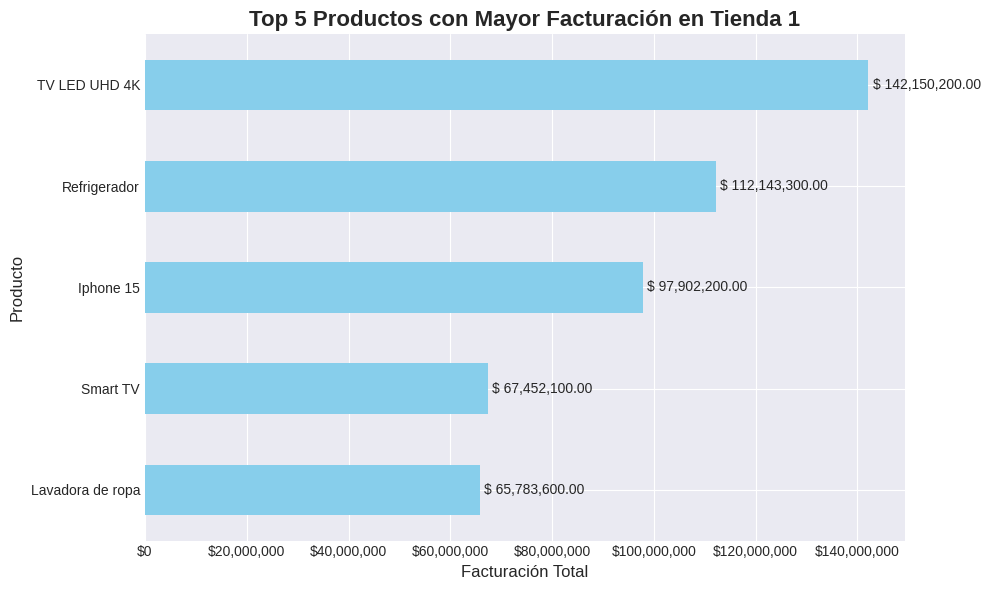

In [27]:
# --- 2. Análisis de Productos por FACTURACIÓN ---
tienda_a_analizar = 'Tienda 1'
df_tienda = datos_completos[datos_completos['Tienda'] == tienda_a_analizar].copy()

if df_tienda.empty:
    print(f"No se encontraron datos para '{tienda_a_analizar}'")
else:
    print(f"\n{'='*50}")
    print(f"💰 ANÁLISIS DE FACTURACIÓN POR PRODUCTO PARA: {tienda_a_analizar.upper()}")
    print(f"{'='*50}")

    facturacion_por_producto = df_tienda.groupby('Producto')['Precio'].sum().sort_values(ascending=False)

    # --- Cálculos y Resumen en Texto ---
    top_5_productos = facturacion_por_producto.head(5)
    bottom_5_productos = facturacion_por_producto.tail(5).sort_values(ascending=True)

    # ... (se omiten los print de texto para brevedad, pero la lógica sigue presente) ...

    # --- Generación del Gráfico 1 (Pastel) ---
    print("\nGenerando gráfico de pastel (Mayores Ventas)...")
    # ... (código del gráfico de pastel omitido para brevedad) ...
    # plt.savefig(...)
    # plt.close()

    # --- Generación del Gráfico 2 (Barras Menos Vendidos) ---
    print("\nGenerando gráfico de barras (Menores Ventas)...")
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    bars = bottom_5_productos.plot(kind='barh', ax=ax2, color='tomato')
    ax2.bar_label(bars.containers[0], fmt='$%.2f', padding=3, fontsize=10)
    ax2.invert_yaxis()
    formatter = mticker.FuncFormatter(lambda x, p: f'${x:,.0f}')
    ax2.xaxis.set_major_formatter(formatter)
    ax2.set_title(f'Top 5 Productos con Menor Facturación en {tienda_a_analizar}', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Facturación Total', fontsize=12)
    ax2.set_ylabel('Producto', fontsize=12)
    plt.tight_layout()
    nombre_archivo_bottom = f'facturacion_bottom_5_productos_{tienda_a_analizar.replace(" ", "_")}.png'
    plt.savefig(nombre_archivo_bottom)
    print(f"✅ Gráfico '{nombre_archivo_bottom}' guardado.")
    plt.close()

    # --- 💡 NUEVO: Gráfico de Barras para Productos con MAYOR Facturación ---
    print("\nGenerando gráfico de barras (Mayores Ventas)...")
    fig3, ax3 = plt.subplots(figsize=(10, 6))

    # Usamos los datos del top 5 que ya calculamos
    bars_top = top_5_productos.plot(kind='barh', ax=ax3, color='skyblue')

    # Añadir etiquetas con el valor exacto al final de cada barra
    ax3.bar_label(bars_top.containers[0], fmt='$ {:,.2f}', padding=3, fontsize=10)

    # Invertir el eje Y para que el producto con MAYOR venta quede arriba
    ax3.invert_yaxis()

    # Formatear el eje X como moneda
    formatter = mticker.FuncFormatter(lambda x, p: f'${x:,.0f}')
    ax3.xaxis.set_major_formatter(formatter)

    # Títulos y etiquetas
    ax3.set_title(f'Top 5 Productos con Mayor Facturación en {tienda_a_analizar}', fontsize=16, fontweight='bold')
    ax3.set_xlabel('Facturación Total', fontsize=12)
    ax3.set_ylabel('Producto', fontsize=12)

    plt.tight_layout()


# 5. Envío promedio por tienda


--- Costo Promedio de Envío por Tienda ---
Tienda
Tienda 4   $23,459.46
Tienda 3   $24,805.68
Tienda 2   $25,216.24
Tienda 1   $26,018.61

Generando gráfico de costo de envío...


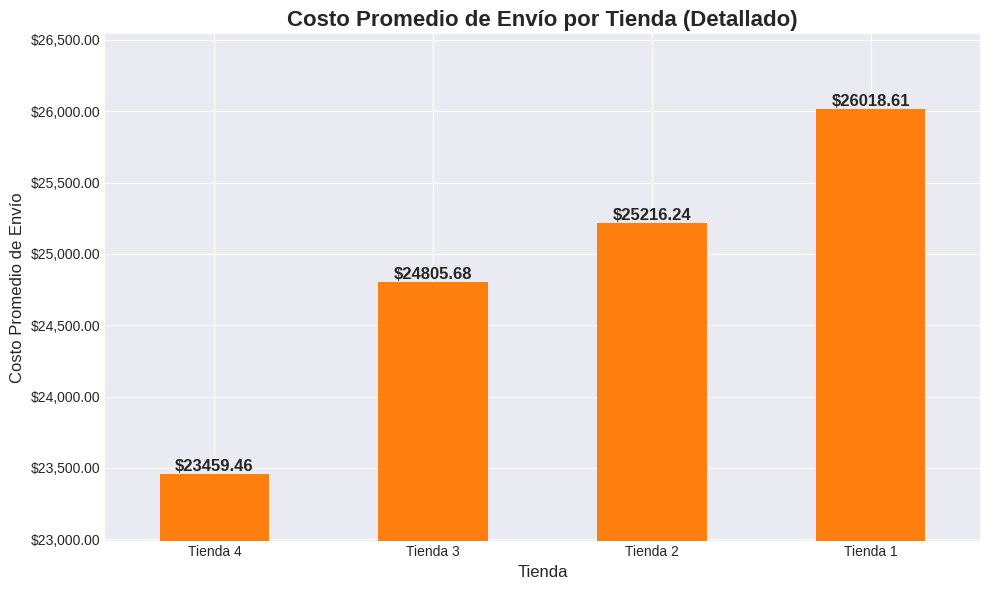

In [30]:
# --- 2. Cálculo del Costo Promedio de Envío ---
print("\n--- Costo Promedio de Envío por Tienda ---")
envio_promedio = datos_completos.groupby('Tienda')['Costo de envío'].mean().sort_values(ascending=True)
print(envio_promedio.to_string(float_format='${:,.2f}'.format))


# --- 3. Generación del Gráfico Detallado ---
print("\nGenerando gráfico de costo de envío...")
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras
bars = envio_promedio.plot(kind='bar', ax=ax, color='#ff7f0e')

# --- AJUSTE PARA EJE Y MÁS DETALLADO ---
min_val = envio_promedio.min()
max_val = envio_promedio.max()
ax.set_ylim(min_val * 0.98, max_val * 1.02) # Se ajusta el eje para "acercar" la vista

# Añadir etiquetas con el valor exacto sobre cada barra
for bar in bars.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'${bar.get_height():.2f}',
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold')

# Formatear el eje Y como moneda
formatter = mticker.FuncFormatter(lambda x, p: f'${x:,.2f}')
ax.yaxis.set_major_formatter(formatter)

# Añadir títulos y etiquetas
ax.set_title('Costo Promedio de Envío por Tienda (Detallado)', fontsize=16, fontweight='bold')
ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Costo Promedio de Envío', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
